Подготовка данных

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [5]:
customers = pd.read_csv('C:/Users/majkl/WorkSpace/Project_6/olist_customers_dataset.csv')
order_items = pd.read_csv('C:/Users/majkl/WorkSpace/Project_6/olist_order_items_dataset.csv', parse_dates = ['shipping_limit_date'])
orders = pd.read_csv('C:/Users/majkl/WorkSpace/Project_6/olist_orders_dataset.csv', parse_dates = [3,4, 5, 6, 7, -1])


In [6]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
print(customers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [8]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [9]:
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [11]:
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


### Сколько у нас пользователей, которые совершили покупку только один раз?  

In [12]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Для выполнения задания мы должны использовать данные со статусом delivered.
Объеденим файл customers_dataset и orders_dataset по общему полю customer_id, чтобы получить уникальные значение покупателя "customer_unique_id " и в последующем найти покупателей совершивших только 1 покупку 

In [13]:
merge = customers.merge(orders, on='customer_id')
merge.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [14]:
orders_st = 'delivered'
orders_delivered = merge.query('order_status == @orders_st') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'count'}) \
    .query('count == 1')


In [15]:
print(f'Число пользователей, которые совершили покупку только один раз равно {orders_delivered.shape[0]}')

Число пользователей, которые совершили покупку только один раз равно 90557


###  Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [16]:
undelivered = orders.query('order_status != @orders_st') \
    .groupby('order_status', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'count'}) \
    .sort_values("count", ascending=False) 
undelivered

,order_status,count
5,shipped,1107
1,canceled,625
6,unavailable,609
3,invoiced,314
4,processing,301
2,created,5
0,approved,2


Детализация по недоставленным заказам

C:\Users\majkl\AppData\Local\Temp\ipykernel_26900\3432208425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=undelivered ,x='order_status', y='count', palette='plasma')


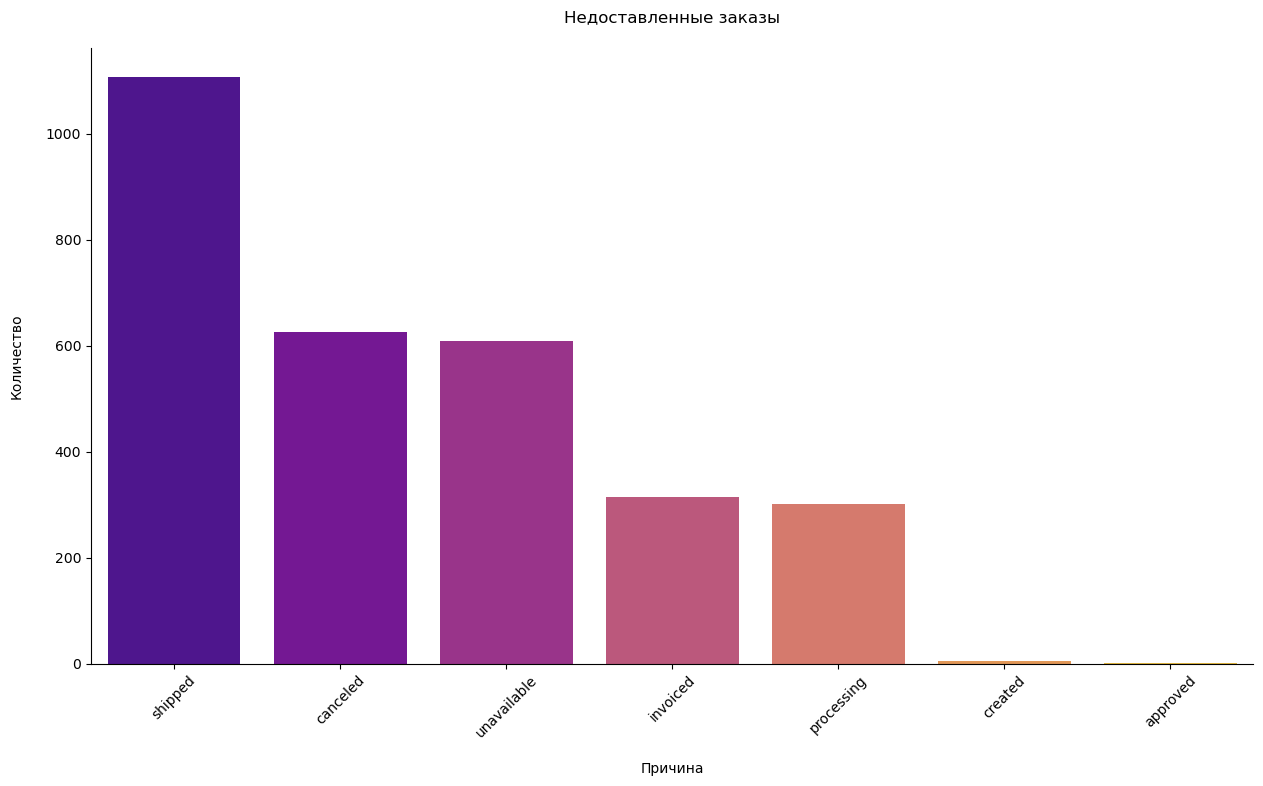

In [17]:
fig = plt.figure(figsize=(15,8))
ax = sns.barplot(data=undelivered ,x='order_status', y='count', palette='plasma')
ax.set_title('Недоставленные заказы\n')
ax.set_ylabel('Количество\n') 
ax.set_xlabel('\nПричина')
plt.xticks(rotation=45) 
sns.despine()

Считаю, что корректно будет выделить заказы со статусами `'canceled'`, `'unavailable'`, `'invoiced'`, так как в других статусах нет основания полагать, что они не доставлены или не доставятся.

In [18]:
monthly = orders[orders.order_status != 'delivered']
orders_count = monthly.groupby(['order_status']) \
                      .agg({'order_id': 'count'}) \
                      .query("order_status in ('canceled', 'unavailable', 'invoiced')") \
                      .rename(columns={'order_id' : 'orders_count'}) \
                      .reset_index()
orders_count


,order_status,orders_count
0,canceled,625
1,invoiced,314
2,unavailable,609


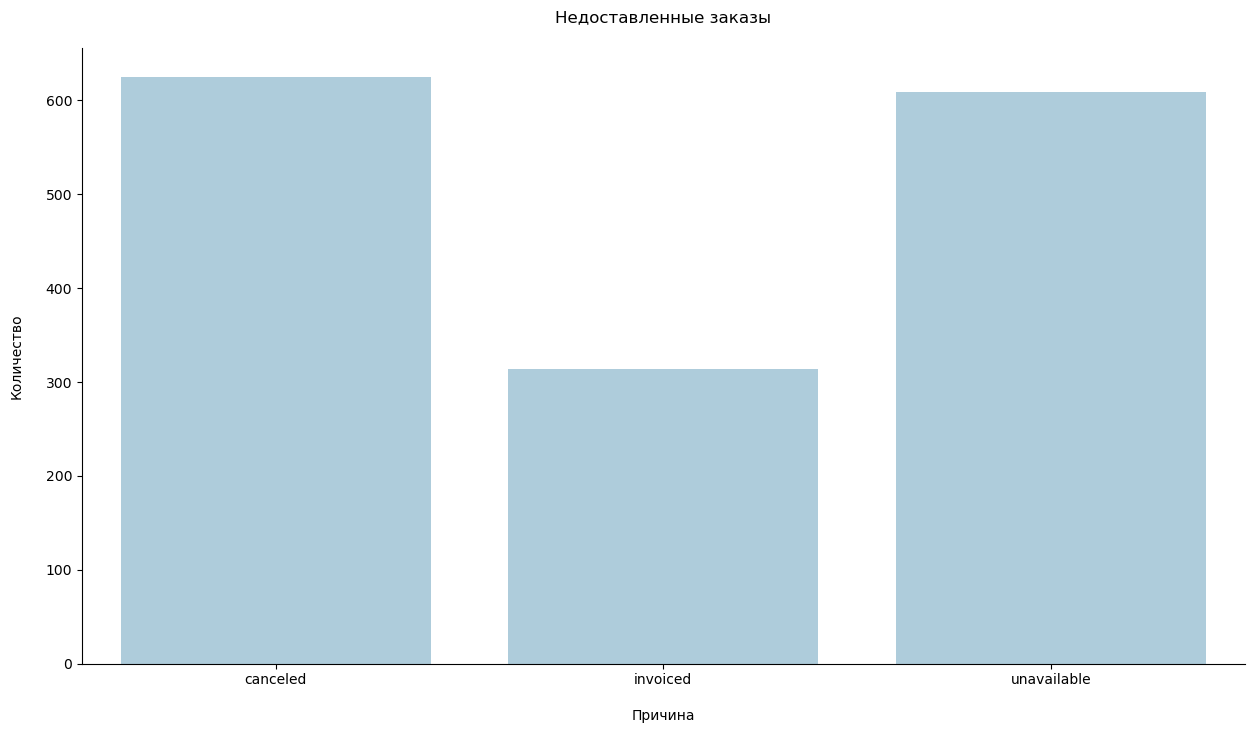

In [19]:

fig = plt.figure(figsize=(15,8))
axx = sns.barplot(data=orders_count ,x='order_status', y='orders_count', palette='Paired', hue=False, legend=False)
axx.set_title('Недоставленные заказы\n')
axx.set_ylabel('Количество\n') 
axx.set_xlabel('\nПричина') 
sns.despine()

In [20]:
monthly['estimated_delivery'] = monthly.order_estimated_delivery_date.apply(lambda x: x.strftime('%Y-%m'))

C:\Users\majkl\AppData\Local\Temp\ipykernel_26900\3096549509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly['estimated_delivery'] = monthly.order_estimated_delivery_date.apply(lambda x: x.strftime('%Y-%m'))


In [21]:
monthly_orders = monthly.groupby(['estimated_delivery', 'order_status']) \
          .agg({'order_id': 'count'}).reset_index()

Ответ на вопрос "Сколько заказов в месяц в среднем не доставляется по разным причинам?"

In [22]:
monthly_orders.query("order_status in ('canceled', 'unavailable', 'invoiced')") \
           .groupby('order_status') \
           .agg({'order_id': 'mean'}) \
           .round(0)

,order_id
order_status,
canceled,24.0
invoiced,15.0
unavailable,29.0


### По каждому товару определить, в какой день недели товар чаще всего покупается.

Для начала объеденим данные из таблицы продукции и заказов

In [25]:
purchase = order_items.merge(orders, how= 'inner', on='order_id')

Добавим колонку с днем, когда был сделан каждый заказ

In [26]:
purchase['order_purchase_timestamp'] = pd.to_datetime(purchase['order_purchase_timestamp'])
purchase['Day'] = purchase['order_purchase_timestamp'].dt.day_name()
purchase

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,Monday
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,Saturday
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,Monday
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,Monday


In [ ]:
day_popular = purchase.groupby(['product_id', 'Day']) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'count'}) \
    .reset_index()

day_popular.pivot(index='product_id', columns='Day', values='count') \
    .idxmax(axis=1) \
    .to_frame() \
    .reset_index() \
    .rename(columns={0:'Day'})


,product_id,Day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Saturday
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Объединяем таблицы с нужными нам данными и добавляем новые столбцы с наименованием года и месяца

In [64]:

purchase = customers[['customer_id', 'customer_unique_id']].merge(orders, how='inner', on='customer_id')
purchase['year'] = purchase['order_purchase_timestamp'].dt.year.astype(int)
purchase['month'] = purchase['order_purchase_timestamp'].dt.month.astype(int)
purchase

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017,5
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018,7
...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018,4
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018,4
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018,4
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017,11


Проводим группировку для подсчета покупок клиентами в месяц

In [65]:
purchase_month = purchase.groupby(['customer_unique_id', 'year', 'month'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'count'}) \
    .sort_values(['year', 'month']) 
    
purchase_month

,customer_unique_id,year,month,count
242,009b0127b727ab0ba422f6d9604487c7,2016,9,1
27787,4854e9b3feff728c13ee5fc7d1547e92,2016,9,1
50307,830d5b7aaa3b6f1e9ad63703bec97d23,2016,9,1
70504,b7d76e111c89f7ebf14761390f0f7d17,2016,9,1
75,0032c76b20340da25249092a268ce66c,2016,10,1
...,...,...,...,...
97703,ff22e30958c13ffe219db7d711e8f564,2018,9,1
14656,262e1f1e26e92e86375f86840b4ffd63,2018,10,1
38121,634420a0ea42302205032ed44ac7fccc,2018,10,1
52004,87ab9fec999db8bd5774917de3cdf01c,2018,10,1


Функция для определения количества недель в месяце

In [59]:
def weeks_in_month(year, month):
    days_in_month = calendar.monthrange(year, month)[1]
    return days_in_month / 7

Рассчитываем среднее количество покупок в неделю

In [ ]:
purchase_counts = purchase_month
purchase_counts['weeks_in_month'] = purchase_counts.apply(lambda row: weeks_in_month(row['year'], row['month']), axis=1)
purchase_counts['average_purchases_per_week'] = purchase_counts['count'] / purchase_counts['weeks_in_month']

In [72]:
purchase_counts.round(2)

,customer_unique_id,year,month,count,weeks_in_month,average_purchases_per_week
242,009b0127b727ab0ba422f6d9604487c7,2016,9,1,4.29,0.23
27787,4854e9b3feff728c13ee5fc7d1547e92,2016,9,1,4.29,0.23
50307,830d5b7aaa3b6f1e9ad63703bec97d23,2016,9,1,4.29,0.23
70504,b7d76e111c89f7ebf14761390f0f7d17,2016,9,1,4.29,0.23
75,0032c76b20340da25249092a268ce66c,2016,10,1,4.43,0.23
...,...,...,...,...,...,...
97703,ff22e30958c13ffe219db7d711e8f564,2018,9,1,4.29,0.23
14656,262e1f1e26e92e86375f86840b4ffd63,2018,10,1,4.43,0.23
38121,634420a0ea42302205032ed44ac7fccc,2018,10,1,4.43,0.23
52004,87ab9fec999db8bd5774917de3cdf01c,2018,10,1,4.43,0.23


### Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 